In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [21]:
import seaborn as sns

In [3]:
train_data = pd.read_excel('train.xlsx')

In [4]:
train_data.head(10)

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33
5,-63,-68,-63,-66,-68,-54,-60,-53,-50,-56,-68,-72,-59,-57,-58,-52,-48,-52,A75
6,-68,-69,-65,-70,-56,-51,-63,-69,-71,-66,-65,-62,-54,-56,-54,-68,-61,-65,A41
7,-61,-65,-53,-59,-66,-68,-75,-70,-66,-53,-64,-64,-70,-69,-79,-78,-78,-75,B14
8,-82,-73,-68,-79,-69,-69,-62,-49,-56,-83,-73,-79,-68,-64,-67,-58,-57,-55,B80
9,-65,-74,-63,-54,-60,-55,-70,-82,-72,-59,-64,-54,-61,-66,-61,-71,-72,-79,A33


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [6]:
train_data.describe()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
count,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000,36752.000000
mean,-65.865449,-64.521931,-64.574472,-65.296474,-64.462152,-63.318731,-67.030202,-66.591260,-65.692479,-65.555181,-65.681922,-66.244204,-63.962614,-64.399080,-64.550011,-64.136782,-65.910726,-66.590417
std,8.737286,8.914559,8.154517,8.142803,8.068375,8.651501,9.257529,10.160193,10.598247,10.408147,9.453958,8.866239,8.254217,9.562839,9.207343,10.540542,10.071973,10.600992
min,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000,-95.000000
25%,-72.000000,-70.000000,-70.000000,-70.000000,-69.000000,-69.000000,-74.000000,-75.000000,-73.000000,-73.000000,-71.000000,-72.000000,-69.000000,-70.000000,-70.000000,-71.000000,-72.000000,-74.000000
50%,-66.000000,-65.000000,-64.000000,-66.000000,-65.000000,-63.000000,-66.000000,-66.000000,-65.000000,-65.000000,-65.000000,-66.000000,-63.000000,-64.000000,-65.000000,-63.000000,-65.000000,-66.000000
75%,-61.000000,-59.000000,-59.000000,-61.000000,-59.000000,-57.000000,-60.000000,-59.000000,-58.000000,-58.000000,-59.000000,-61.000000,-58.000000,-58.000000,-58.000000,-57.000000,-59.000000,-59.000000
max,-41.000000,-37.000000,-41.000000,-39.000000,-36.000000,-39.000000,-45.000000,-39.000000,-39.000000,-37.000000,-40.000000,-43.000000,-43.000000,-39.000000,-38.000000,-40.000000,-43.000000,-39.000000


In [13]:
X = train_data.drop('target',axis=1)

In [14]:
X.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80


In [15]:
#scaling the features
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Now using elbow method for finding optimal number of clustering

In [16]:
inertia = []
K = range(1, 20)  
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

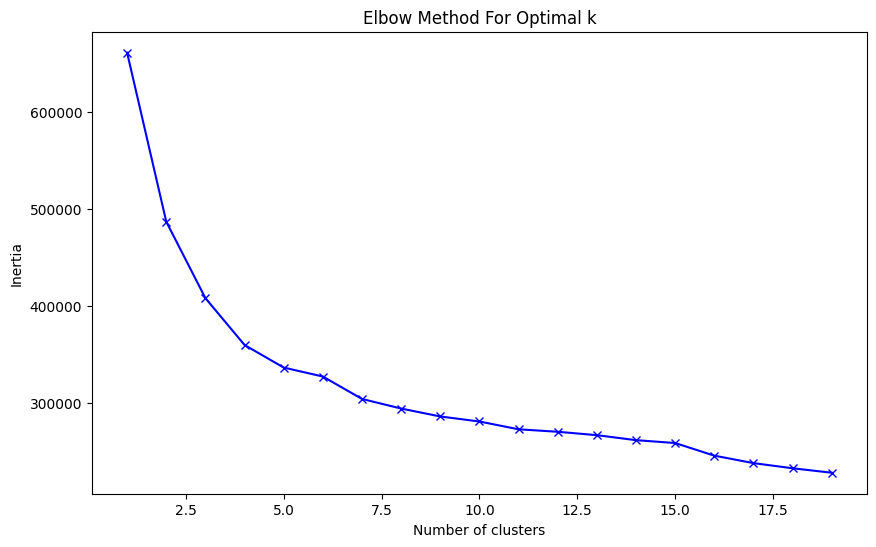

In [18]:
#now ploting the inertia
plt.figure(figsize=(10,6))
plt.plot(K, inertia,'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

Let's take number on cluster be 5 i.e n = 5

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
train_data['Cluster'] = kmeans.fit_predict(X_scaled)

In [20]:
kmeans.cluster_centers_

array([[ 0.38948027,  0.62535525,  0.82564602,  1.05317995,  0.56405664,
         0.38099015, -0.22325549, -0.18073291, -0.18522923,  0.45916068,
         0.57471765,  0.76952638,  0.7646648 ,  0.01441113,  0.00649755,
        -0.17567229, -0.2685702 , -0.38539794],
       [-0.99029536, -0.98097204, -0.86071639, -0.67589974, -0.3442178 ,
        -0.45226437,  0.22344739,  0.63245164,  0.83962585, -1.06111766,
        -1.05081326, -1.04629143, -0.86836821, -0.05872055, -0.12460248,
         0.31243424,  0.66682011,  0.79145235],
       [-0.55961201,  0.09080272, -0.52167965, -1.16397539, -1.48420789,
        -1.19328532, -1.48751001, -1.61588815, -1.6128909 , -0.39254953,
        -0.78068433, -0.644463  , -0.92308706, -1.68611464, -1.83782302,
        -1.4849265 , -1.61888664, -1.5758543 ],
       [-0.15649095, -0.28528655, -0.06118743, -0.01740878,  0.50287212,
         0.73045643,  0.91596462,  0.67854843,  0.40561606, -0.12858662,
        -0.08488401, -0.0308097 ,  0.35403778,  0.975

In [22]:
train_data.columns

Index(['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11',
       'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18', 'target', 'Cluster'],
      dtype='object')

In [29]:
feature_names = ['T1', 'T2', 'T3', 'T4', 'T5', 'T6', 'T7', 'T8', 'T9', 'T10', 'T11', 'T12', 'T13', 'T14', 'T15', 'T16', 'T17', 'T18']

In [31]:
centers_df = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)

In [32]:
centers_df

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,0.389480,0.625355,0.825646,1.053180,0.564057,0.380990,-0.223255,-0.180733,-0.185229,0.459161,0.574718,0.769526,0.764665,0.014411,0.006498,-0.175672,-0.268570,-0.385398
1,-0.990295,-0.980972,-0.860716,-0.675900,-0.344218,-0.452264,0.223447,0.632452,0.839626,-1.061118,-1.050813,-1.046291,-0.868368,-0.058721,-0.124602,0.312434,0.666820,0.791452
2,-0.559612,0.090803,-0.521680,-1.163975,-1.484208,-1.193285,-1.487510,-1.615888,-1.612891,-0.392550,-0.780684,-0.644463,-0.923087,-1.686115,-1.837823,-1.484926,-1.618887,-1.575854
3,-0.156491,-0.285287,-0.061187,-0.017409,0.502872,0.730456,0.915965,0.678548,0.405616,-0.128587,-0.084884,-0.030810,0.354038,0.975081,0.945856,0.865256,0.661084,0.616243
4,1.141027,0.723593,0.084134,-0.401014,-0.745633,-0.741939,-0.860893,-1.083797,-0.940736,1.025201,0.880699,0.424846,-0.312858,-0.891844,-0.693449,-0.984141,-0.958081,-0.881273


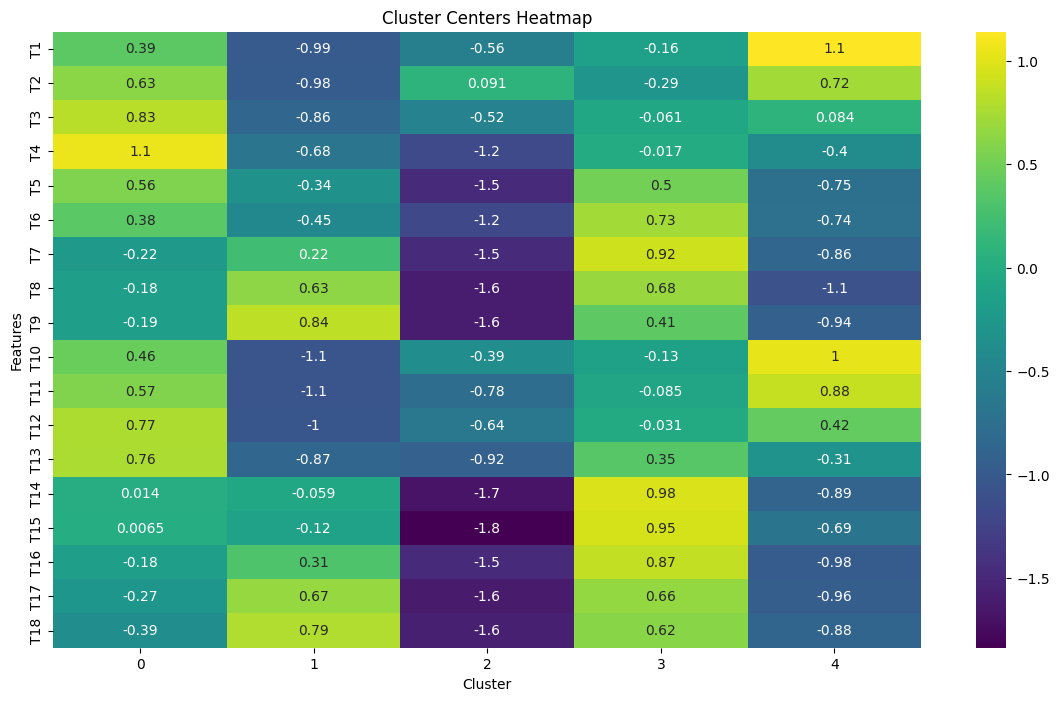

In [33]:
plt.figure(figsize=(14, 8))
sns.heatmap(centers_df.T, annot=True, cmap='viridis')
plt.title('Cluster Centers Heatmap')
plt.xlabel('Cluster')
plt.ylabel('Features')
plt.show()

In [34]:
train_data[['target','Cluster']]

,target,Cluster
0,B37,0
1,B61,1
2,A19,0
3,A22,2
4,A33,0
...,...,...
36747,B34,0
36748,B15,0
36749,A6,4
36750,B2,4


In [39]:
train_data['target'].value_counts().tail(10)

target
B32    195
B74    194
B66    193
A58    193
B77    192
A27    191
B65    191
A69    190
A18    189
A9     188
Name: count, dtype: int64

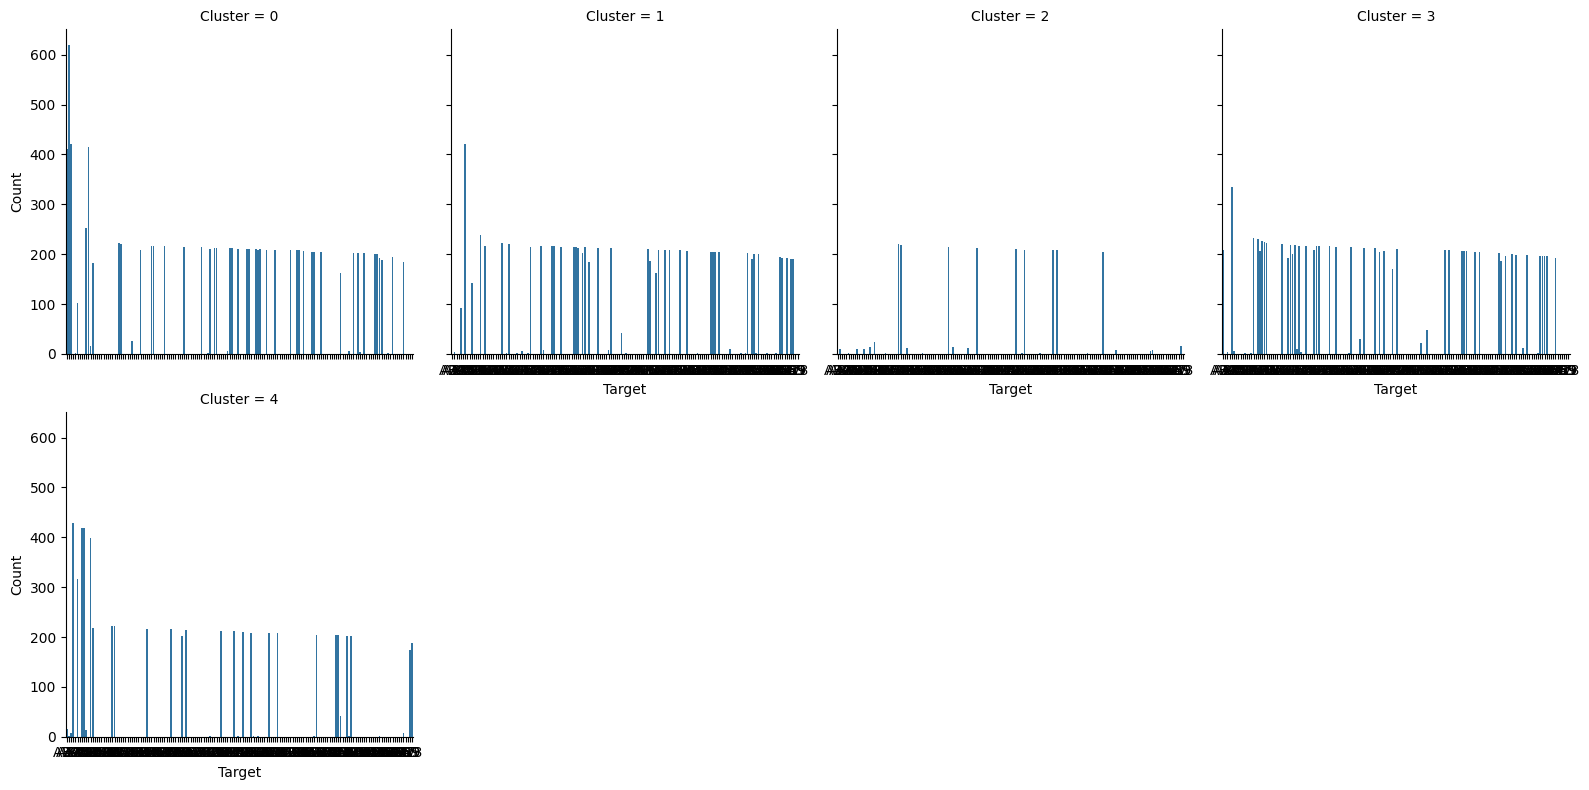

In [40]:
g = sns.FacetGrid(train_data, col="Cluster", col_wrap=4, height=4)
g.map(sns.countplot, "target", order=train_data['target'].value_counts().index)
g.set_axis_labels("Target", "Count")
plt.show()

In [42]:
pivot_table = train_data.pivot_table(index='Cluster', columns='target', aggfunc='size', fill_value=0)

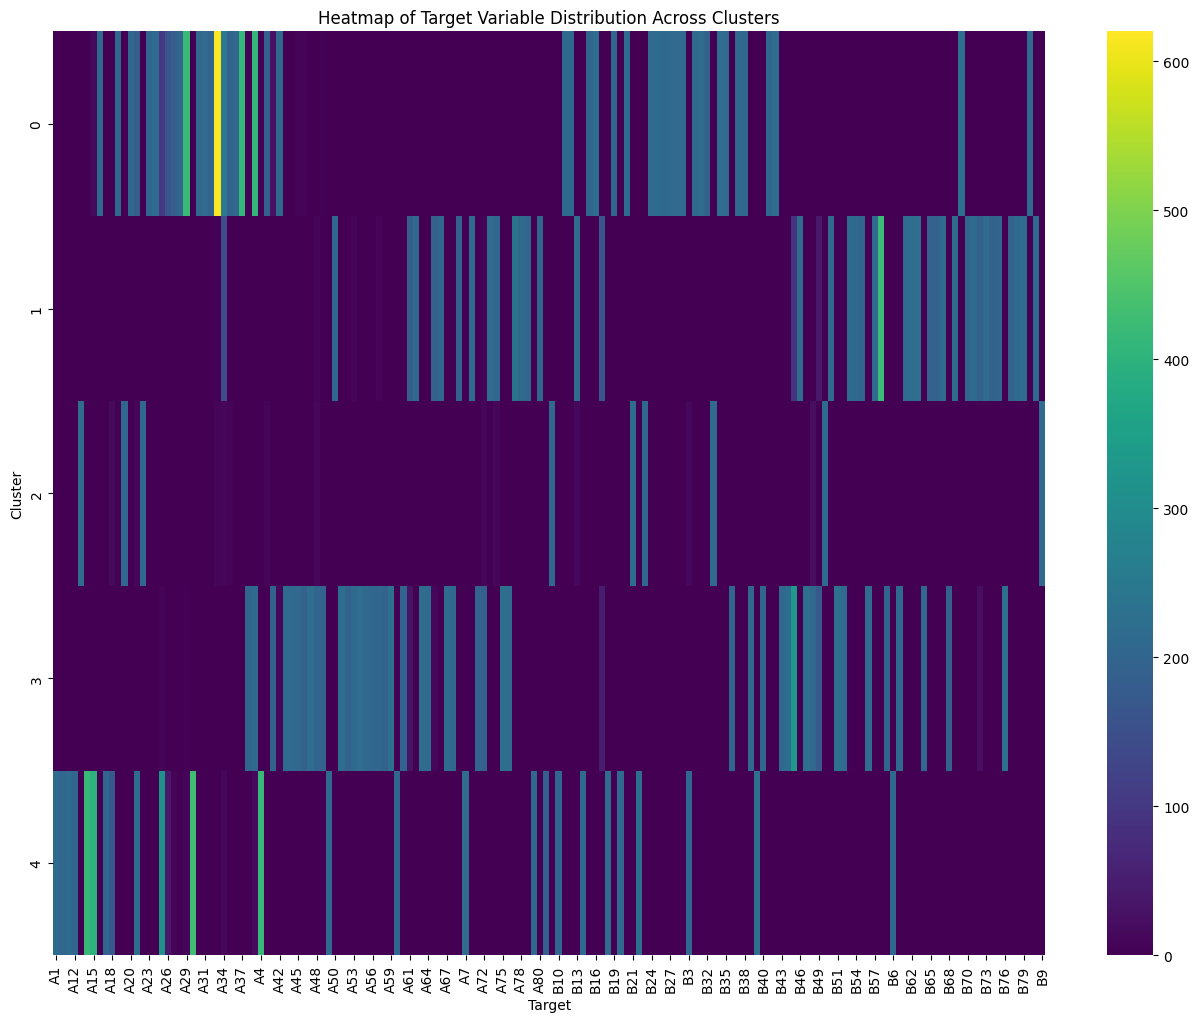

In [43]:
plt.figure(figsize=(16, 12))
sns.heatmap(pivot_table, cmap='viridis')
plt.title('Heatmap of Target Variable Distribution Across Clusters')
plt.xlabel('Target')
plt.ylabel('Cluster')
plt.show()

In [44]:
train_data.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target,Cluster
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37,0
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61,1
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19,0
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22,2
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33,0


In [45]:
#function to identify the cluster where the data point belongs to

def predict_and_explain(data_point, kmeans, scaler, centers_df, feature_names, target_feature, train_data):
    #transform the data_point
    data_point_scaled = scaler.transform([data_point])
    
    # Predict the cluster
    cluster_label = kmeans.predict(data_point_scaled)[0]
    
    # Retrieve the cluster center
    cluster_center = centers_df.loc[cluster_label]
    
    # Find the most common target value(s) in this cluster
    cluster_members = train_data[kmeans.labels_ == cluster_label]
    most_common_target = cluster_members[target_feature].value_counts().idxmax()
    
    
    explanation = f"The data point belongs to cluster {cluster_label} because it is closest to the cluster center with the following characteristics:\n"
    for feature, value in zip(feature_names, data_point_scaled[0]):
        center_value = cluster_center[feature]
        explanation += f"Feature {feature}: {value:.2f} (Data Point) vs {center_value:.2f} (Cluster Center)\n"
    
    return cluster_label, most_common_target, explanation

In [48]:
#example of data point
new_data_point = [0.5, -1.2, 0.3, 0.8, -0.5, 1.1, -0.3, 0.9, -1.1, 0.2, 0.7, -0.6, 1.0, -0.7, 0.4, -0.2, 0.6, -0.8]

#predicting cluser of given data
cluster_label, most_common_target, explanation = predict_and_explain(new_data_point, kmeans, scaler, centers_df, feature_names,'target', train_data)

print(f"Predicted Cluster: {cluster_label}")
print(f"Most Common Target in this Cluster: {most_common_target}")
print("Explanation:")
print(explanation)


Predicted Cluster: 3
Most Common Target in this Cluster: B45
Explanation:
The data point belongs to cluster 3 because it is closest to the cluster center with the following characteristics:
Feature T1: 7.60 (Data Point) vs -0.16 (Cluster Center)
Feature T2: 7.10 (Data Point) vs -0.29 (Cluster Center)
Feature T3: 7.96 (Data Point) vs -0.06 (Cluster Center)
Feature T4: 8.12 (Data Point) vs -0.02 (Cluster Center)
Feature T5: 7.93 (Data Point) vs 0.50 (Cluster Center)
Feature T6: 7.45 (Data Point) vs 0.73 (Cluster Center)
Feature T7: 7.21 (Data Point) vs 0.92 (Cluster Center)
Feature T8: 6.64 (Data Point) vs 0.68 (Cluster Center)
Feature T9: 6.09 (Data Point) vs 0.41 (Cluster Center)
Feature T10: 6.32 (Data Point) vs -0.13 (Cluster Center)
Feature T11: 7.02 (Data Point) vs -0.08 (Cluster Center)
Feature T12: 7.40 (Data Point) vs -0.03 (Cluster Center)
Feature T13: 7.87 (Data Point) vs 0.35 (Cluster Center)
Feature T14: 6.66 (Data Point) vs 0.98 (Cluster Center)
Feature T15: 7.05 (Data Poin

C:\Users\User\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
